In [1]:
import numpy as np
import pandas as pd
from numpy import mean
from numpy import std

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('ggplot')
from plotly import tools
import plotly.offline as py
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import itertools

from scipy.stats import skew
from scipy.stats.mstats import normaltest

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [2]:

adidas=pd.read_excel('Alt04 -Adidas US Sales Datasets.xlsx')

In [3]:
adidas.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store


In [4]:
adidas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   int64         
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   float64       
 8   Units Sold        9648 non-null   int64         
 9   Total Sales       9648 non-null   float64       
 10  Operating Profit  9648 non-null   float64       
 11  Operating Margin  9648 non-null   float64       
 12  Sales Method      9648 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 980.0+ KB


In [5]:
adidas.isnull().sum()


Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64

In [6]:
adidas.shape

(9648, 13)

<AxesSubplot:>

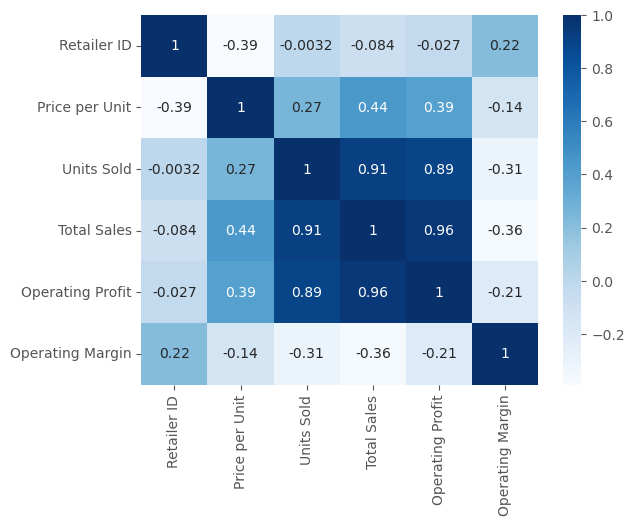

In [7]:
adidas.corr()
sns.heatmap(adidas.corr(),annot =True,cmap='Blues')

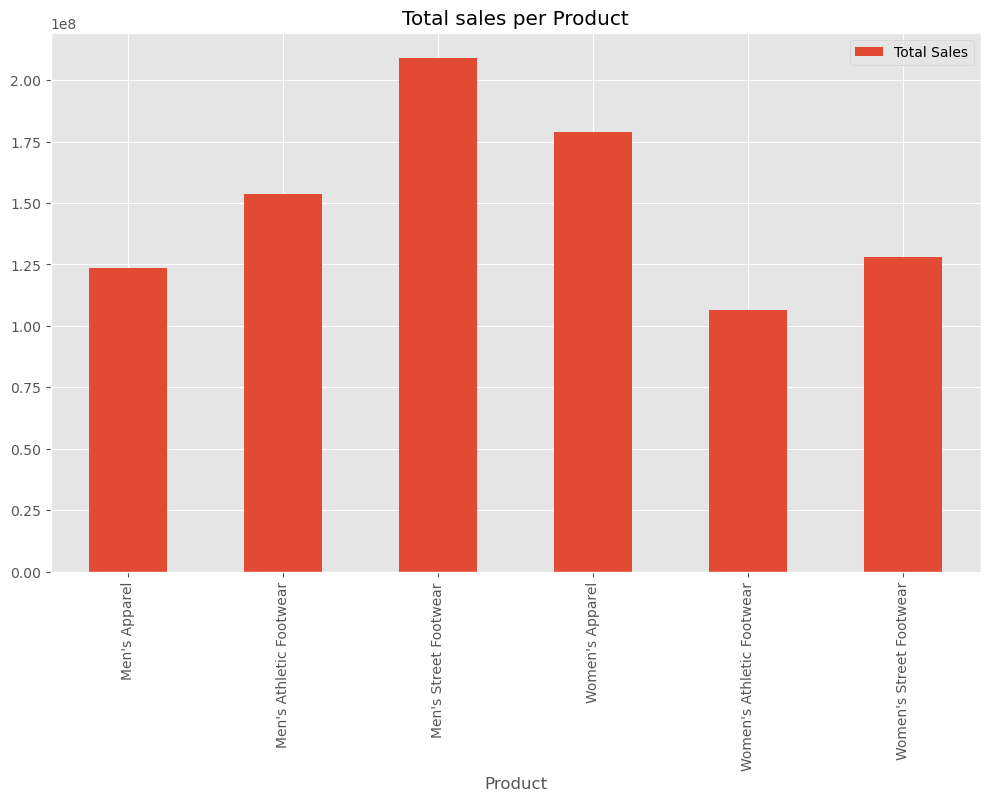

In [8]:
top_products= adidas[['Product','Total Sales']].groupby('Product').sum()
top_products
top_products.plot(kind='bar',figsize=(12,7),title='Total sales per Product')
plt.show()

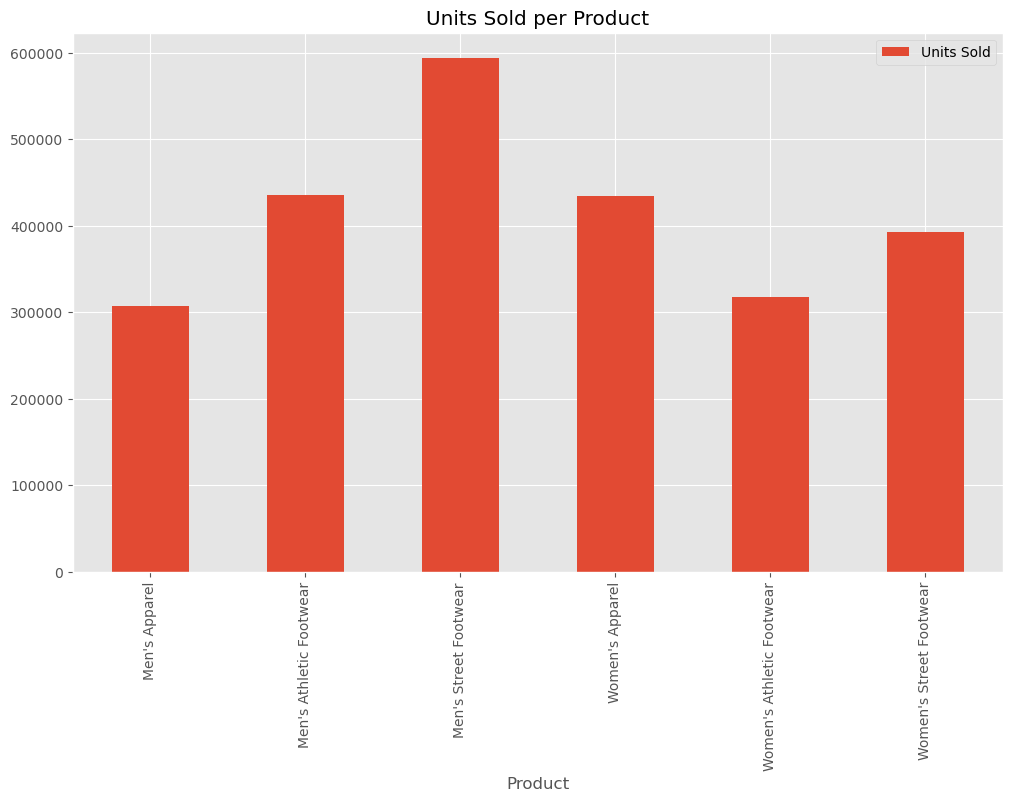

In [9]:
top_products_units= adidas[['Product','Units Sold']].groupby('Product').sum()
top_products_units
top_products_units.plot(kind='bar',figsize=(12,7),title='Units Sold per Product')
plt.show()

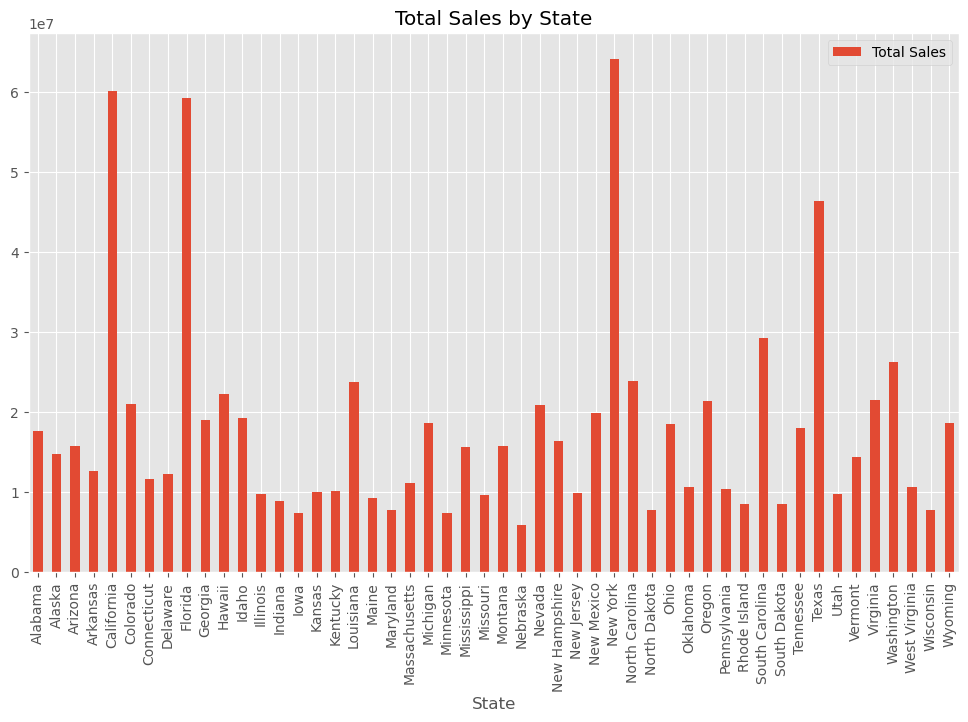

In [10]:
salesbystate= adidas[['State','Total Sales']].groupby('State').sum()
salesbystate
salesbystate.plot(kind='bar',figsize=(12,7),title='Total Sales by State')
plt.show()

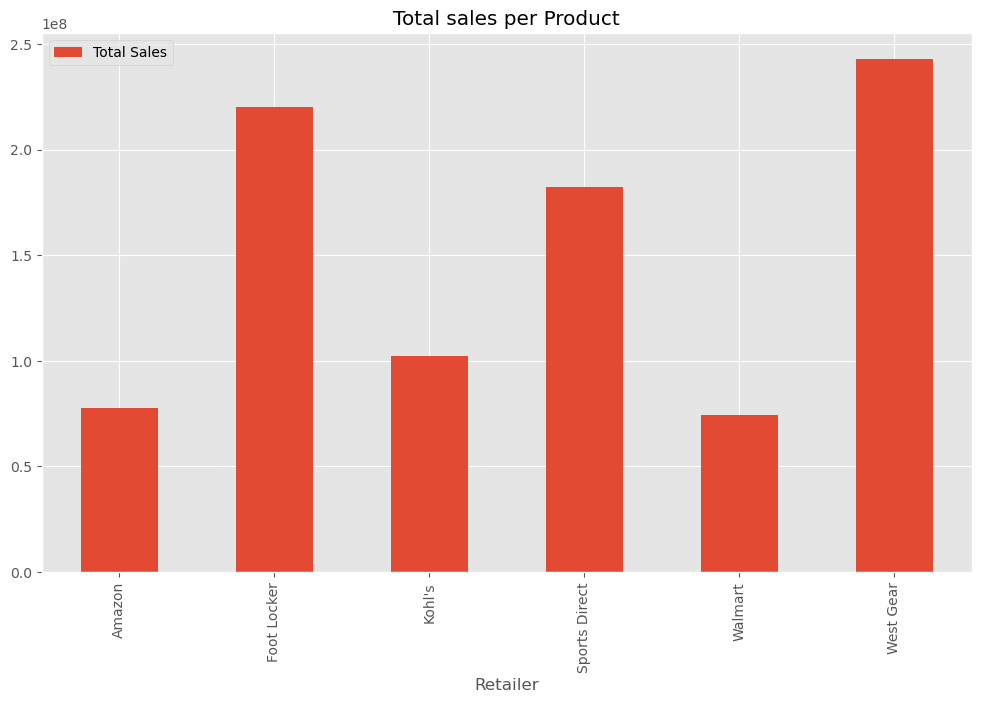

In [11]:
top_products= adidas[['Retailer','Total Sales']].groupby('Retailer').sum()
top_products
top_products.plot(kind='bar',figsize=(12,7),title='Total sales per Product')
plt.show()

-West gear has the highest number of sales, followed by Footlocker and Sports direct
-Newyork has the highest sales followed by California and Florida
-Men's Street footwear has the highest sales followed by Women's apparel which is proportional to their units sold.

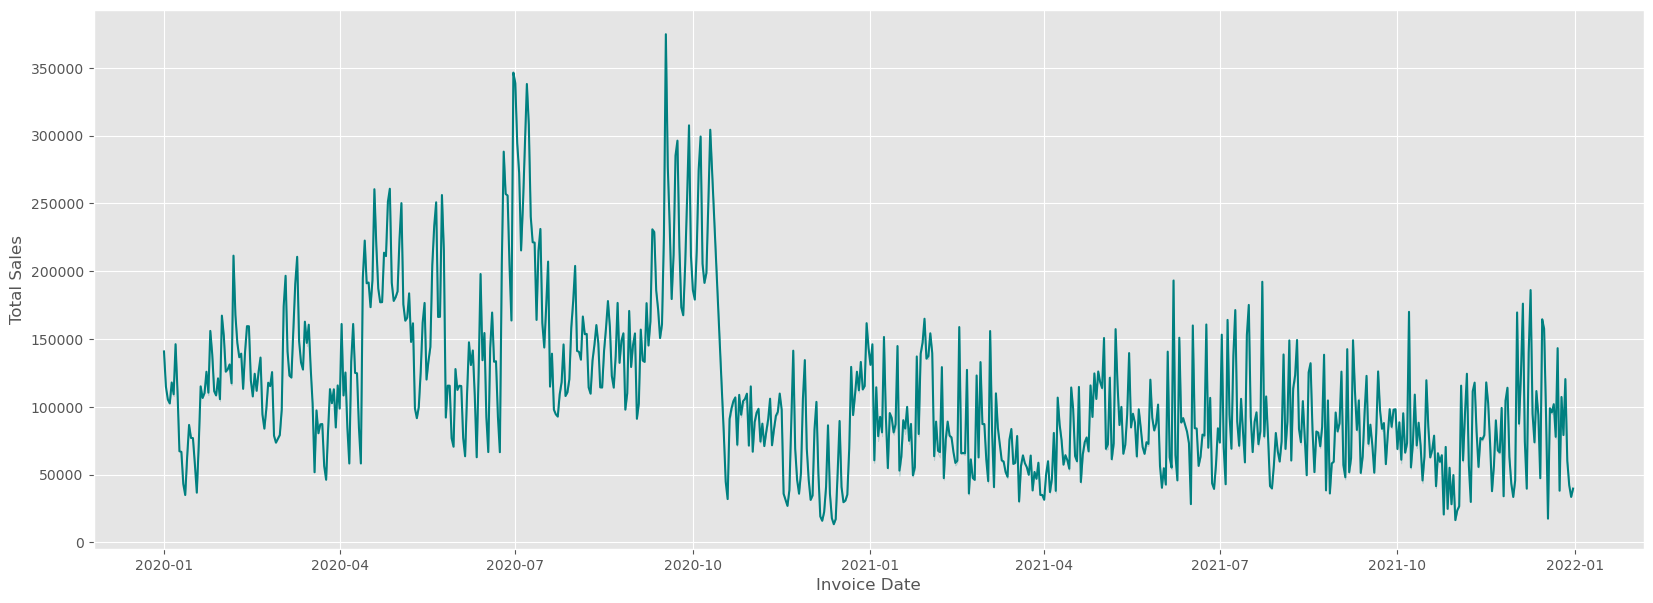

In [12]:
plt.figure(figsize=(20,7))
sns.lineplot(data = adidas, x = 'Invoice Date', y = 'Total Sales', ci= False, color= 'teal')
plt.show()

<AxesSubplot:xlabel='Product', ylabel='Total Sales'>

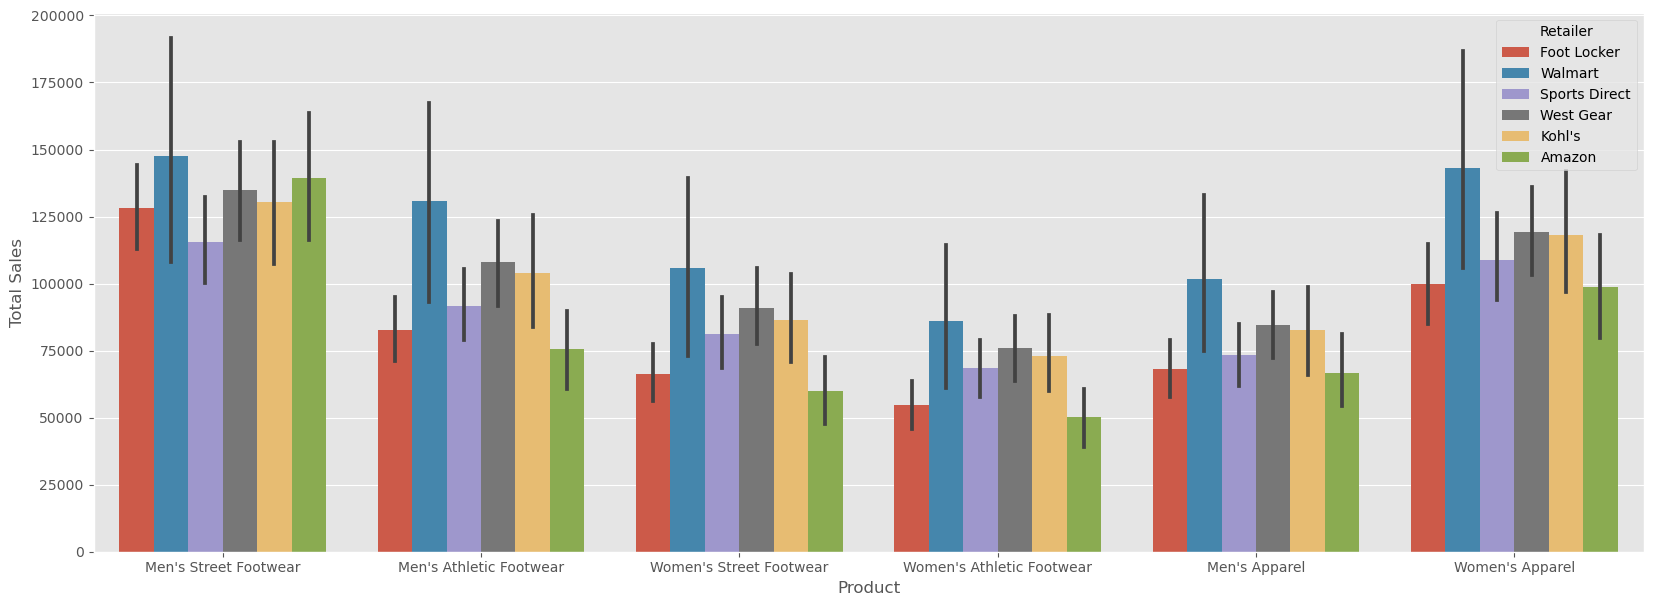

In [13]:
plt.figure(figsize=(20,7))
sns.barplot(x = "Product", y = "Total Sales", hue = "Retailer", data= adidas)

There is a dip in sales in 2021 vs 2020.
Walmart has highest sales across all the products

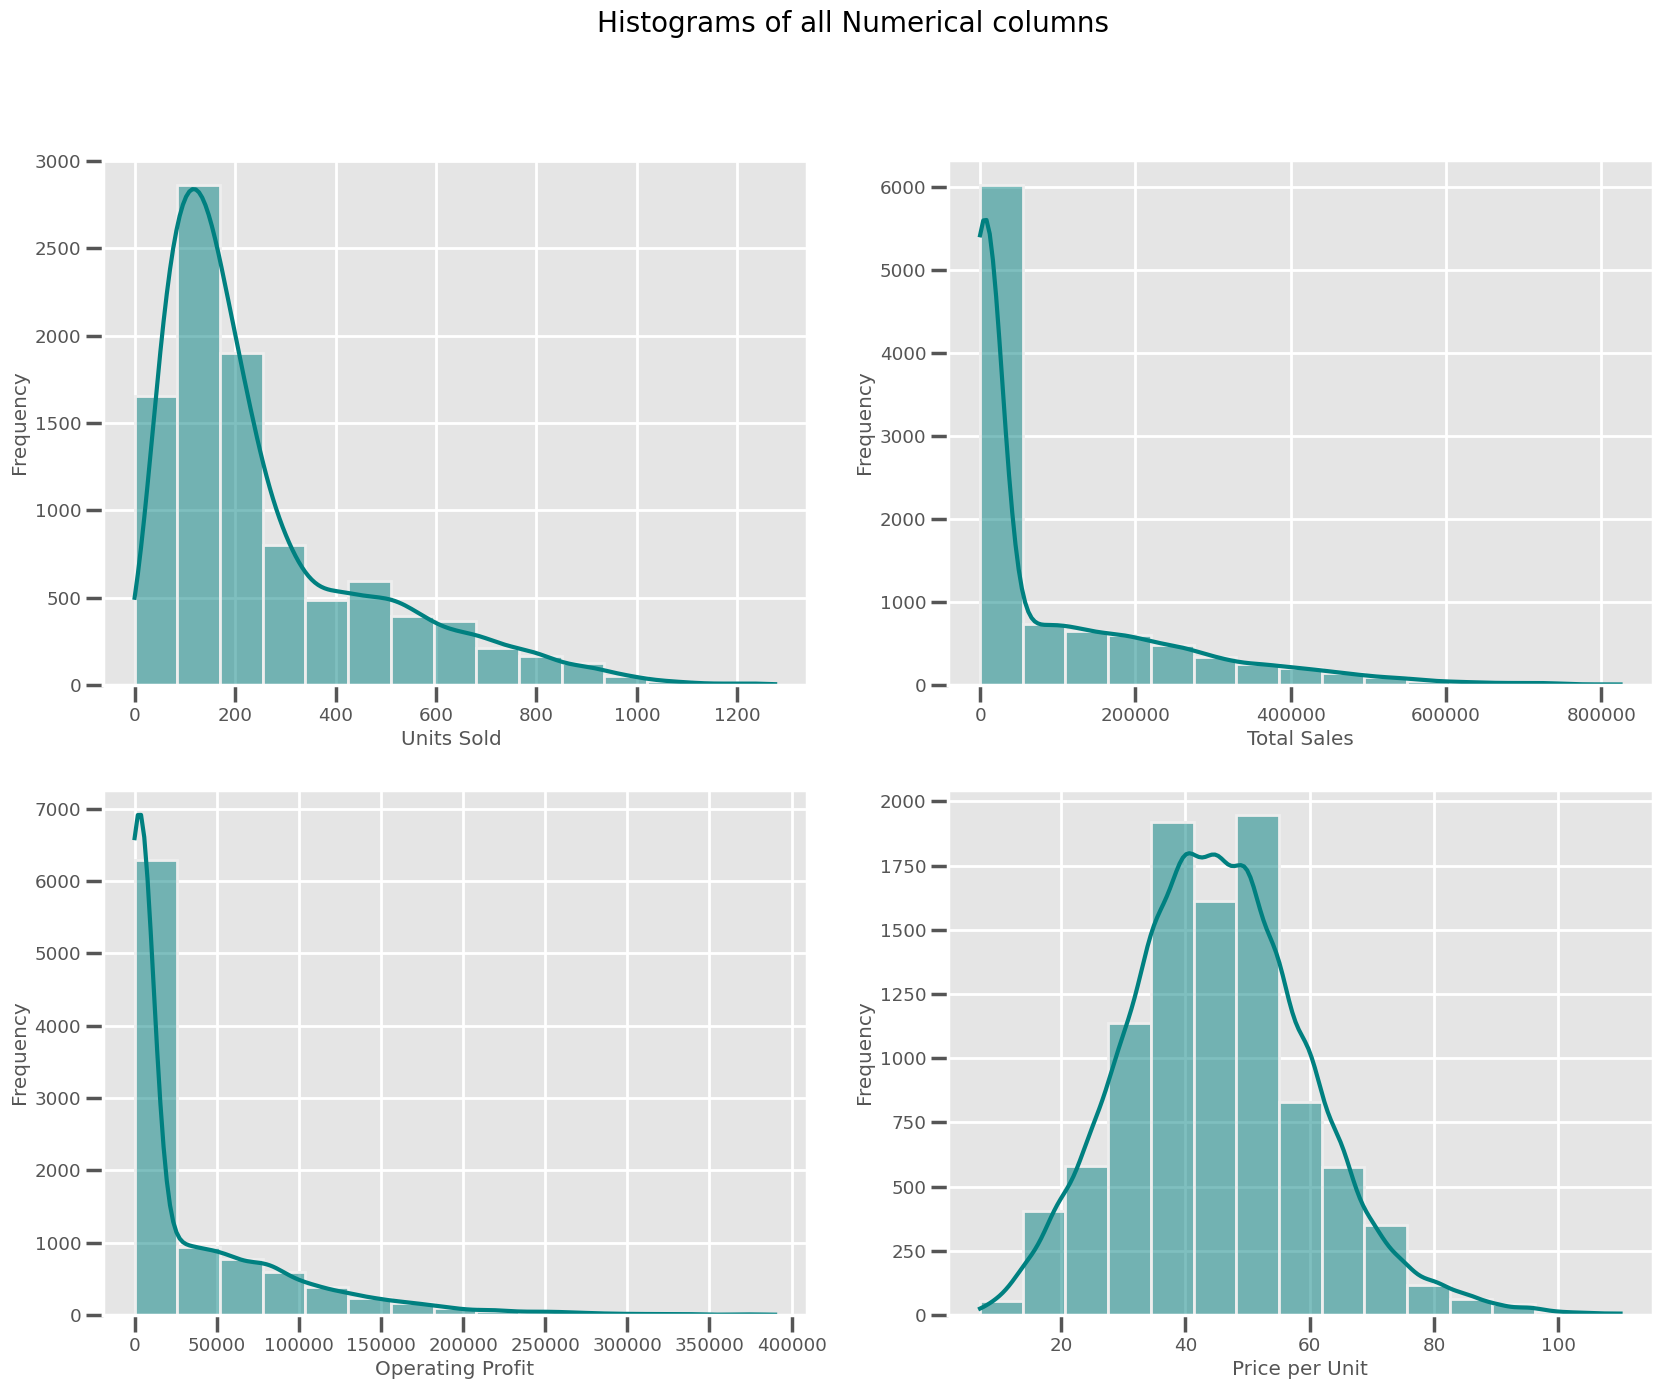

In [14]:
sns.set_context('poster', font_scale= 0.6)
fig, ax  = plt.subplots(2, 2, figsize= (20, 15))

plt.suptitle('Histograms of all Numerical columns', fontsize = 20)

ax1 = sns.histplot(x = adidas['Units Sold'], color= 'teal', ax= ax[0, 0], bins= 15, kde= True)
ax1.set(xlabel= 'Units Sold ', ylabel= 'Frequency')

ax2 = sns.histplot(x = adidas['Total Sales'], color= 'teal', ax= ax[0, 1], bins= 15, kde= True)
ax2.set(xlabel= 'Total Sales', ylabel= 'Frequency')

ax3 = sns.histplot(x = adidas['Operating Profit'], color= 'teal', ax= ax[1, 0], bins= 15, kde= True)
ax3.set(xlabel= 'Operating Profit', ylabel= 'Frequency')

ax4 = sns.histplot(x = adidas['Price per Unit'], color= 'teal', ax= ax[1, 1], bins= 15, kde= True)
ax4.set(xlabel= 'Price per Unit', ylabel= 'Frequency')

plt.show()

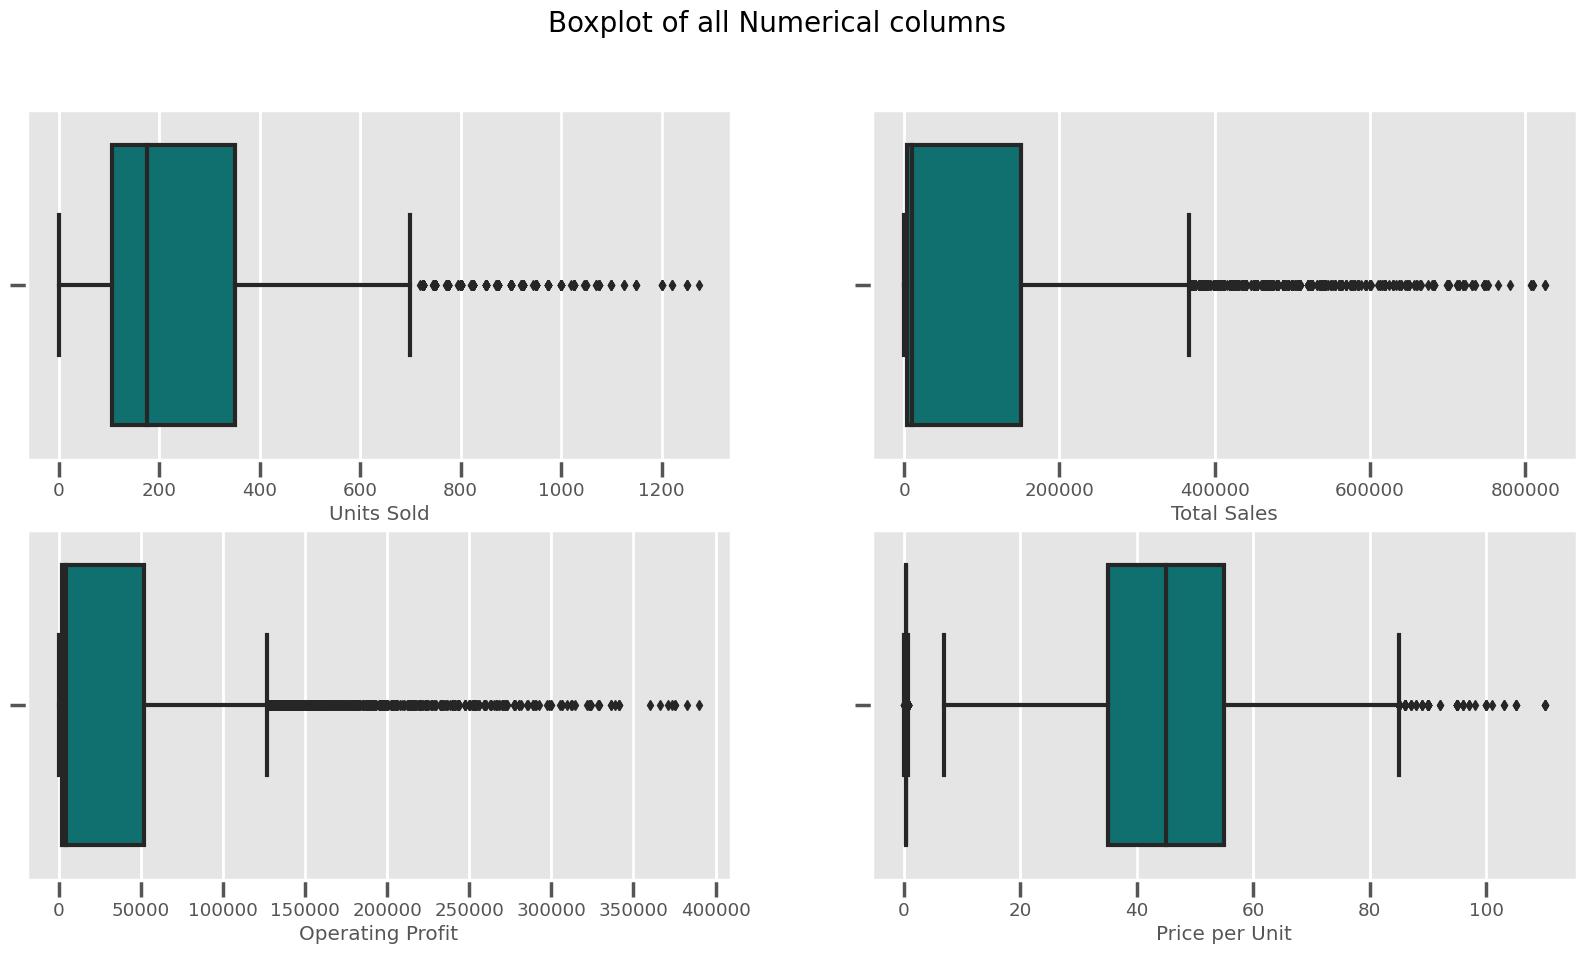

In [15]:
sns.set_context('poster', font_scale= 0.6)
fig, ax  = plt.subplots(2, 2, figsize= (20, 10))

plt.suptitle('Boxplot of all Numerical columns', fontsize = 20)

ax1 = sns.boxplot(x = adidas['Units Sold'], color= 'teal', ax= ax[0, 0])
ax1.set(xlabel= 'Units Sold')

ax2 = sns.boxplot(x = adidas['Total Sales'], color= 'teal', ax= ax[0, 1])
ax2.set(xlabel= 'Total Sales')

ax3 = sns.boxplot(x = adidas['Operating Profit'], color= 'teal', ax= ax[1, 0])
ax3.set(xlabel= 'Operating Profit')

ax4 = sns.boxplot(x = adidas['Operating Margin'], color= 'teal', ax= ax[1, 1])
ax4.set(xlabel= 'Operating Margin')

ax4 = sns.boxplot(x = adidas['Price per Unit'], color= 'teal', ax= ax[1, 1])
ax4.set(xlabel= 'Price per Unit')
plt.show()

Units sold, Total sales, operating profit are positively skewed and operating margin is normally distributed.

<AxesSubplot:xlabel='Invoice Date', ylabel='Total Sales'>

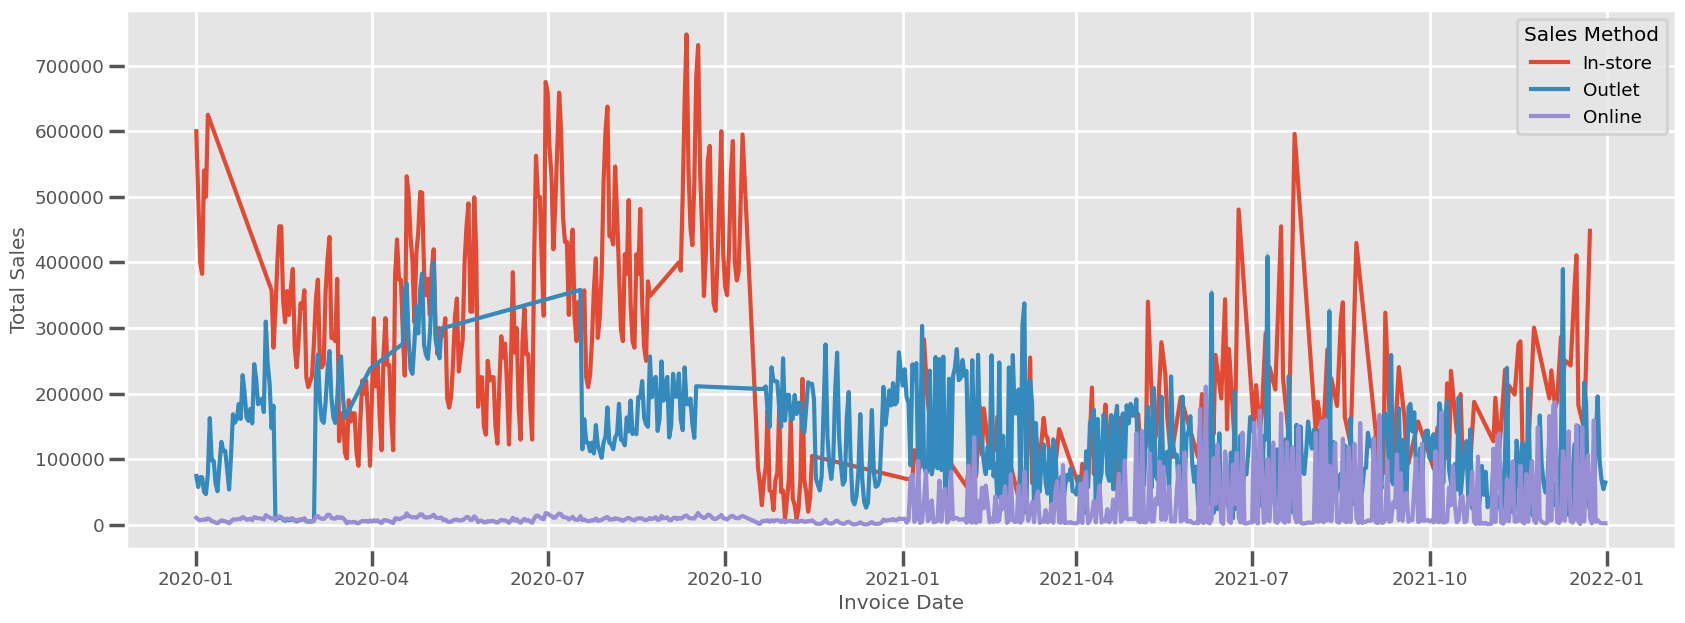

In [16]:
plt.figure(figsize=(20,7))
sns.lineplot(x = "Invoice Date", y = "Total Sales", hue = "Sales Method", data= adidas, ci= False)




- There is an increase in sales visible clearly by online method in 2021 compared to 2020.